## Linear Logistic Regression Binary Classifier Implementation and Demonstration 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogReg import *
%matplotlib inline

### Generate Data, split into train and test sets

In [9]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=400, n_features=2, 
                           centers=2, cluster_std=3.50, random_state=1)
Dtrain, Dtest, train_labs, test_labs = train_test_split(data, labels, test_size=0.25, random_state=42)

Xtrain = Dtrain[:,0]
Ytrain = Dtrain[:,1]
Xtest = Dtest[:,0]
Ytest = Dtest[:,1]

### Illustration of classification target data in 2D 

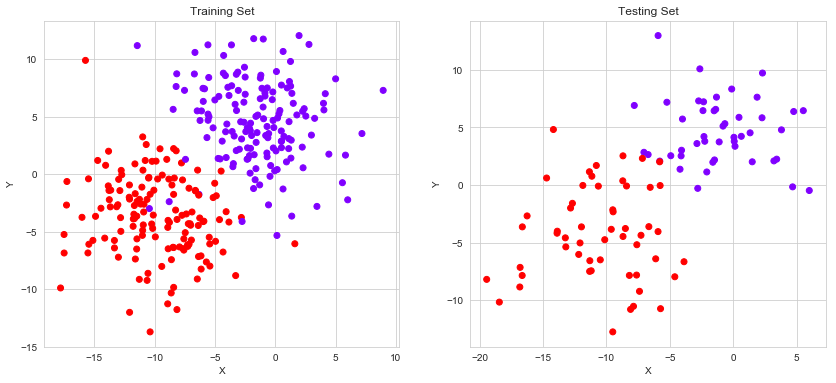

In [10]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,6))
p1 = plt.subplot(121, title = 'Training Set')
plt.scatter(Xtrain , Ytrain, c = train_labs, cmap='rainbow')
plt.ylabel('Y')
plt.xlabel('X')

p2 = plt.subplot(122, title = 'Testing Set')
plt.scatter(Xtest , Ytest, c = test_labs, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')

### Invoke home brewed functions to  train and test

In [11]:
Train = add_bias(Dtrain)
Test = add_bias(Dtest)
theta = train(Train ,y = train_labs)

pred_train = test(Train, theta)
pred_test = test(Test, theta)

fit_train = - np.dot(Train,theta)/theta[2] + Ytrain
fit_test = - np.dot(Test,theta)/theta[2] + Ytest

### Visually illustrate how it works including desicion boundary on both training and testing sets

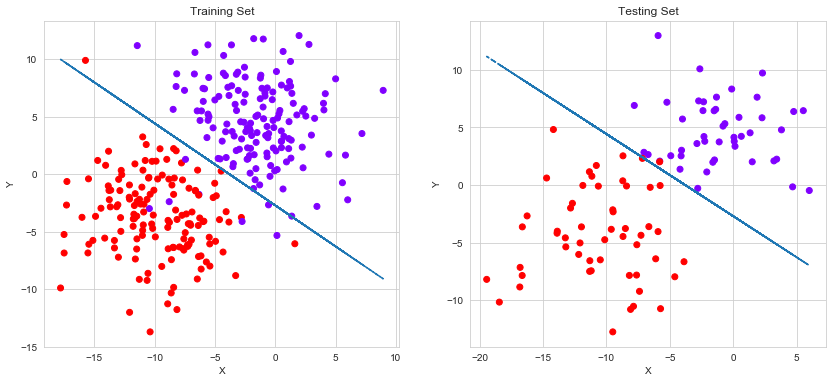

In [12]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,6))
p1 = plt.subplot(121, title = 'Training Set')
plt.scatter(Xtrain , Ytrain, c = train_labs, cmap='rainbow')
plt.plot(Xtrain, fit_train,'--')
plt.ylabel('Y')
plt.xlabel('X')

p2 = plt.subplot(122, title = 'Testing Set')
plt.scatter(Xtest , Ytest, c = test_labs, cmap='rainbow')
plt.plot(Xtest, fit_test,'--')
plt.xlabel('X')
plt.ylabel('Y')

### Check prediction accuracies

In [17]:
getAccuracy(labels=train_labs, pred_labels = pred_train,method="class")

0.9733333333333334

In [18]:
getAccuracy(labels=test_labs, pred_labels = pred_test,method="class")

0.99

### Not bad for learning purpose! Can be improved further by adding penalty terms(Lasso or Ridge), polynomial degrees for non-linear decision boundary and multilabel classification!